In [3]:
! unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dental_Radiography/train/Normal/0854_jpg.rf.37ca6ae0329082bc82469f9e7f48cda6_segment_23.png  
  inflating: Dental_Radiography/train/Normal/0854_jpg.rf.37ca6ae0329082bc82469f9e7f48cda6_segment_6.png  
  inflating: Dental_Radiography/train/Normal/0854_jpg.rf.37ca6ae0329082bc82469f9e7f48cda6_segment_7.png  
  inflating: Dental_Radiography/train/Normal/0854_jpg.rf.37ca6ae0329082bc82469f9e7f48cda6_segment_8.png  
  inflating: Dental_Radiography/train/Normal/0856_jpg.rf.5568f0b80e8e89364fb25411b3dd9e3d_segment_10.png  
  inflating: Dental_Radiography/train/Normal/0856_jpg.rf.5568f0b80e8e89364fb25411b3dd9e3d_segment_11.png  
  inflating: Dental_Radiography/train/Normal/0856_jpg.rf.5568f0b80e8e89364fb25411b3dd9e3d_segment_12.png  
  inflating: Dental_Radiography/train/Normal/0856_jpg.rf.5568f0b80e8e89364fb25411b3dd9e3d_segment_13.png  
  inflating: Dental_Radiography/train/Normal/0856_jpg.rf.5568f0b80e8e89364fb25411b3dd9e3d_segmen

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

In [35]:
test_data_dir = "/content/Dental_Radiography/test"
train_data_dir = "/content/Dental_Radiography/train"
valid_data_dir = "/content/Dental_Radiography/valid"

In [36]:
# Set the image size and batch size
IMG_SIZE = (64, 64)
BATCH_SIZE = 512


In [38]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True
)

# Just rescaling for validation and testing
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Just rescaling for validation and testing
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for train, validation, and test sets
train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

valid_data = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)
test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)
# Check class indices
print("Class Indices: ", train_data.class_indices)

Found 25136 images belonging to 5 classes.
Found 2812 images belonging to 5 classes.
Found 1649 images belonging to 5 classes.
Class Indices:  {'Cavity': 0, 'Fillings': 1, 'Impacted Tooth': 2, 'Implant': 3, 'Normal': 4}


In [39]:
import os


In [40]:
assert os.path.exists(train_data_dir), f"Training directory {train_data_dir} does not exist"
assert os.path.exists(test_data_dir), f"Test directory {test_data_dir} does not exist"
assert os.path.exists(valid_data_dir), f"Validation directory {valid_data_dir} does not exist"

print("All directories exist.")


All directories exist.


In [16]:
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

# Check for each expected class directory in the training, test, and validation directories
for class_name in expected_classes:
    assert os.path.exists(os.path.join(train_data_dir, class_name)), f"Class {class_name} not found in training directory"
    assert os.path.exists(os.path.join(test_data_dir, class_name)), f"Class {class_name} not found in test directory"
    assert os.path.exists(os.path.join(valid_data_dir, class_name)), f"Class {class_name} not found in validation directory"

print("All expected subdirectories exist in training, test, and validation directories.")

All expected subdirectories exist in training, test, and validation directories.


In [17]:
def check_files_in_directory(directory):
    for class_name in expected_classes:
        class_dir = os.path.join(directory, class_name)
        assert len(os.listdir(class_dir)) > 0, f"No files found in {class_dir}"

# Check that there are files in each subdirectory
check_files_in_directory(train_data_dir)
check_files_in_directory(test_data_dir)
check_files_in_directory(valid_data_dir)

print("All directories contain files.")

All directories contain files.


In [19]:
# Define the path to your dataset (adjust this path accordingly)
dataset_path = '/content/Dental_Radiography/train'
dataset_path = '/content/Dental_Radiography/test'
dataset_path = '/content/Dental_Radiography/valid'
path_dataset = (dataset_path)
# List all class directories
class_names = os.listdir(path_dataset)

# Initialize a dictionary to store the number of images per class
image_counts = {}

# Count the number of images in each class
for class_name in class_names:
    class_path = os.path.join(path_dataset, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_count = len([f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))])  # You can adjust image extensions
        image_counts[class_name] = image_count

# Display the counts in the notebook
print("Number of images in each class:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")


Number of images in each class:
Fillings: 540 images
Impacted Tooth: 38 images
Cavity: 43 images
Implant: 159 images
Normal: 2032 images


In [20]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Updated path to match your dataset structure
img = load_img(f"{train_data_dir}/Cavity/0012_jpg.rf.4b11c696273493e2cbf801072ae9633a_segment_5368.png")
x = img_to_array(img) / 255  # We divide the pixel value by 255 to normalize between 0 and 1

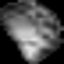

In [30]:
img

In [31]:
x.shape

(64, 64, 3)

In [41]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [42]:
from tensorflow.keras.utils import image_dataset_from_directory


In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [44]:
model = Sequential()

# Define the input shape explicitly using Input
model.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model.add(layers.Rescaling(1./255))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Fourth Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model.add(layers.Dropout(0.5))

# Output Layer with Softmax
model.add(layers.Dense(5, activation="softmax"))

In [45]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,381 (911.64 KB)

 Trainable params: 233,381 (911.64 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
BATCH_SIZE = 32

In [48]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training data
train_ds = image_dataset_from_directory(
    train_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)
# Load the validation data
valid_ds = image_dataset_from_directory(
    valid_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [49]:
class_names = train_ds.class_names
print(class_names)

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']


In [50]:
MODEL = "model"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [51]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [52]:
%%time
history = model.fit(
        train_ds,
        epochs=10,
        validation_data=valid_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])

Epoch 1/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6934 - loss: 0.8541
Epoch 1: val_loss improved from inf to 0.53751, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 145s 181ms/step - accuracy: 0.6935 - loss: 0.8540 - val_accuracy: 0.7941 - val_loss: 0.5375 - learning_rate: 0.0010
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7774 - loss: 0.5996
Epoch 2: val_loss improved from 0.53751 to 0.47810, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 205s 185ms/step - accuracy: 0.7774 - loss: 0.5996 - val_accuracy: 0.8250 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8231 - loss: 0.4966
Epoch 3: val_loss improved from 0.47810 to 0.38565, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 202s 185ms/step - accuracy: 0.8231 - loss: 0.4966 - val_accuracy: 0.8595 - val_loss: 0.3857 - learning_rate: 0.0010
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy:

In [53]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [54]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

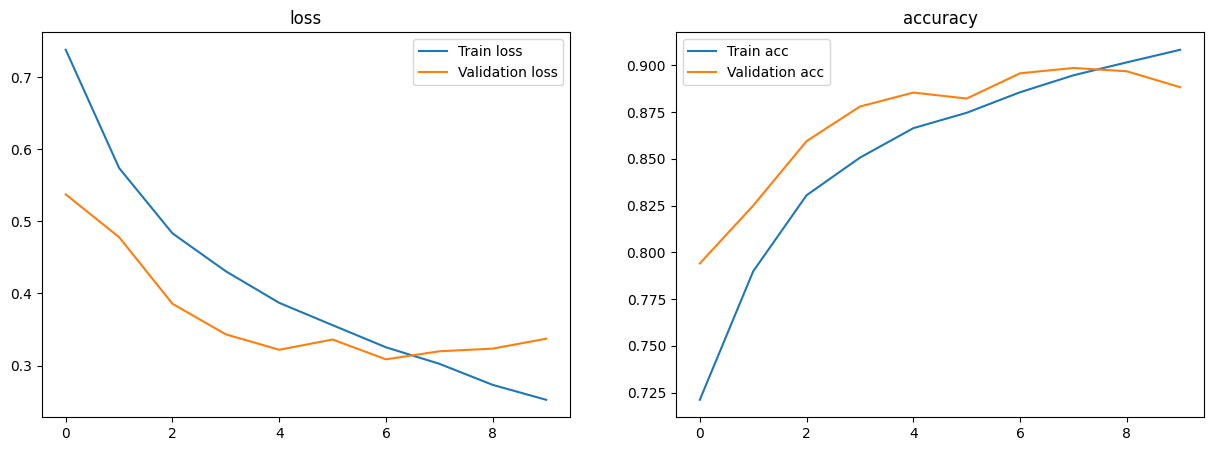

In [55]:
plot_history(history)


In [57]:
model.save('dental_CNN.keras')